In [11]:
#https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.label

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage.morphology
from skimage.morphology import label

gval = 1
nval = 10

#pure_bkg_pred = np.load("100_pure_bkg_allpred.npy")
#bkgpSig_pred = np.load(f"100_bkgp_g{gval}_n{nval}_allpred.npy")

pure_bkg_pred = np.load("diff_stepsize/500_pure_bkg_allpred_5step.npy")
bkgpSig_pred = np.load(f"diff_stepsize/500_bkgp_g{gval}_n{nval}_offLSS_5step.npy")
bkgpSig_true = np.load(f"diff_stepsize/500_sampled_sig_g{gval}_n{nval}_offLSS_5step.npy")

pathsig = '/afs/crc.nd.edu/user/t/tkim12/Work/CMB_ML/Data/Nside1024/test_img/'
sig_only = np.empty((0, 720, 720))
for evnts in range(1):
    temp2 = np.load(pathsig+"sig_larger/200_PHS_720sq_g1_Sig_offLSS_"+str(evnts+1)+".npy")
    sig_only = np.concatenate((sig_only,temp2))

sideval = int(np.sqrt(pure_bkg_pred.shape[1]))
reshaped_bkg = pure_bkg_pred.reshape((500,sideval,sideval))
reshaped_sig = bkgpSig_pred.reshape((500,sideval,sideval))

In [12]:
sideval

127

In [13]:
clean_sig = (reshaped_sig > 0.9)# All exists in T/F  # could do "* reshaped_sig" for 
clean_bkg = (reshaped_bkg > 0.9)# All exists in T/F  # could do "* reshaped_sig" for

cleaned_sigs = []
cleaned_bkgs = []

true_sigcap = 0
fake_bkgcap = 0

for evnt in range(len(reshaped_sig)):
    
    clean_sig2 = label(clean_sig[evnt], background = 0, connectivity=2)
    clean_bkg2 = label(clean_bkg[evnt], background = 0, connectivity=2)
    
    sig2max = clean_sig2.max()
    bkg2max = clean_bkg2.max()
    
    subtract = 0
    clustering_val_threshold = 20
    
    for ii in range(1, sig2max+1):
        extact = clean_sig2[clean_sig2==ii]
        filtr = (clean_sig2!=ii)
        
        if len(extact) < clustering_val_threshold:
            clean_sig2 = filtr * clean_sig2
            subtract += 1
    
    subtractbkg = 0
    for jj in range(1, bkg2max+1):
        extact = clean_bkg2[clean_bkg2==jj]
        filtr = (clean_bkg2!=jj)
        
        if len(extact) < clustering_val_threshold:
            clean_bkg2 = filtr * clean_bkg2
            subtractbkg += 1
    
    cleaned_sigs.append(clean_sig2)
    cleaned_bkgs.append(clean_bkg2)
    
    sig_candid = sig2max-subtract
    bkg_fake = bkg2max-subtractbkg
    
    print(f"Event {evnt+1} : Clutered PHS candidate in window = {sig_candid} with {bkg_fake} fake")
    true_sigcap += sig_candid - bkg_fake
    fake_bkgcap += bkg_fake

cleaned_sigs = np.array(cleaned_sigs)
cleaned_bkgs = np.array(cleaned_bkgs)

Event 1 : Clutered PHS candidate in window = 0 with 0 fake
Event 2 : Clutered PHS candidate in window = 0 with 0 fake
Event 3 : Clutered PHS candidate in window = 0 with 0 fake
Event 4 : Clutered PHS candidate in window = 1 with 0 fake
Event 5 : Clutered PHS candidate in window = 0 with 0 fake
Event 6 : Clutered PHS candidate in window = 0 with 0 fake
Event 7 : Clutered PHS candidate in window = 0 with 0 fake
Event 8 : Clutered PHS candidate in window = 0 with 0 fake
Event 9 : Clutered PHS candidate in window = 0 with 0 fake
Event 10 : Clutered PHS candidate in window = 0 with 0 fake
Event 11 : Clutered PHS candidate in window = 0 with 0 fake
Event 12 : Clutered PHS candidate in window = 0 with 0 fake
Event 13 : Clutered PHS candidate in window = 1 with 1 fake
Event 14 : Clutered PHS candidate in window = 0 with 0 fake
Event 15 : Clutered PHS candidate in window = 0 with 0 fake
Event 16 : Clutered PHS candidate in window = 0 with 0 fake
Event 17 : Clutered PHS candidate in window = 0 w

Event 198 : Clutered PHS candidate in window = 0 with 0 fake
Event 199 : Clutered PHS candidate in window = 0 with 0 fake
Event 200 : Clutered PHS candidate in window = 0 with 0 fake
Event 201 : Clutered PHS candidate in window = 1 with 1 fake
Event 202 : Clutered PHS candidate in window = 0 with 0 fake
Event 203 : Clutered PHS candidate in window = 0 with 0 fake
Event 204 : Clutered PHS candidate in window = 0 with 0 fake
Event 205 : Clutered PHS candidate in window = 0 with 0 fake
Event 206 : Clutered PHS candidate in window = 0 with 0 fake
Event 207 : Clutered PHS candidate in window = 1 with 1 fake
Event 208 : Clutered PHS candidate in window = 0 with 0 fake
Event 209 : Clutered PHS candidate in window = 0 with 0 fake
Event 210 : Clutered PHS candidate in window = 0 with 0 fake
Event 211 : Clutered PHS candidate in window = 0 with 0 fake
Event 212 : Clutered PHS candidate in window = 0 with 0 fake
Event 213 : Clutered PHS candidate in window = 0 with 0 fake
Event 214 : Clutered PHS

Event 388 : Clutered PHS candidate in window = 1 with 1 fake
Event 389 : Clutered PHS candidate in window = 1 with 1 fake
Event 390 : Clutered PHS candidate in window = 0 with 0 fake
Event 391 : Clutered PHS candidate in window = 0 with 0 fake
Event 392 : Clutered PHS candidate in window = 0 with 0 fake
Event 393 : Clutered PHS candidate in window = 0 with 0 fake
Event 394 : Clutered PHS candidate in window = 0 with 0 fake
Event 395 : Clutered PHS candidate in window = 0 with 0 fake
Event 396 : Clutered PHS candidate in window = 0 with 0 fake
Event 397 : Clutered PHS candidate in window = 0 with 0 fake
Event 398 : Clutered PHS candidate in window = 0 with 0 fake
Event 399 : Clutered PHS candidate in window = 0 with 0 fake
Event 400 : Clutered PHS candidate in window = 0 with 0 fake
Event 401 : Clutered PHS candidate in window = 1 with 1 fake
Event 402 : Clutered PHS candidate in window = 1 with 1 fake
Event 403 : Clutered PHS candidate in window = 0 with 0 fake
Event 404 : Clutered PHS

In [14]:
true_sigcap/(nval*500)*100

0.5

In [15]:
fake_bkgcap/500*100

6.6000000000000005

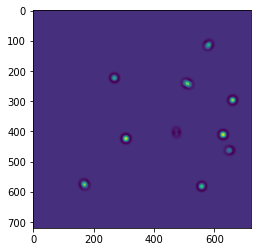

In [15]:
evnt_list = bkgpSig_true[46]

sig_only2 = np.zeros((720,720))
for ii in range(len(evnt_list)):
    sig_only2 += sig_only[evnt_list[ii]]

plt.imshow(sig_only2)
#plt.savefig(f"./diff_stepsize/sample_true_g{gval}_n{nval}.pdf",bbox_inches='tight')

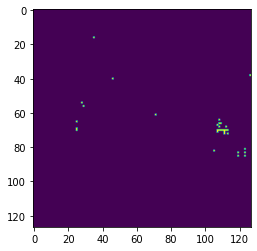

In [16]:
plt.imshow(clean_sig[46])
#plt.savefig(f"./diff_stepsize/sample_pred_g{gval}_n{nval}.pdf",bbox_inches='tight')

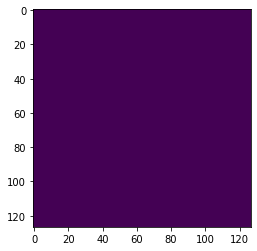

In [17]:
plt.imshow(cleaned_sigs[46]>0)
#plt.savefig(f"./diff_stepsize/sample_pred_g{gval}_n{nval}_cleaned.pdf",bbox_inches='tight')

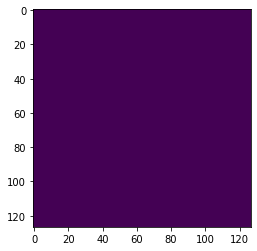

In [18]:
plt.imshow(cleaned_bkgs[46])
#plt.savefig(f"./diff_stepsize/sample_pred_bkg_cleaned.pdf",bbox_inches='tight')

In [59]:
def find_nth_smallest(a, n):
    return np.partition(a, n-1)[n-1]